# Revision of complex numbers

This demo is supposed to be a refresher on [complex numbers](https://en.wikipedia.org/wiki/Complex_number) and a visualization of the fundamental operations that can be done with them.

This demo was written by [Markus Nölle](https://www.htw-berlin.de/hochschule/personen/person/?eid=9586) and Simon Schütze for a basic course on signals and systems held at the [university of applied siences, Berlin](https://www.htw-berlin.de/).

# Notes on displaying this notebook

#### Toggling between display modes

Jupyter Lab displays lines of code and outputs generated by said code in separate cells. If you are interested in learning how the equations and visualizations found in this demo are implemented in Python, you might want to look at the raw code cells. If, on the other hand, your primary goal is to simply refresh your knowledge of complex numbers, those code cells might be disruptive to your reading flow.

**By default, the code cells in this notebook are collapsed/hidden. Click on 'View -> Expand/Collapse All Code' to toggle their visibility on or off.**

#### Interactive elements in Jupyter Lab/Jupyter Notebook/Binder

This notebook contains interactive sliders and menus, called widgets. While most of the code is Python-based, displaying these widgets requires a Javascript implementation that might not be preinstalled or properly up to date when you open the notebooks in Jupyter Lab or Notebook on your machine, resulting in the sliders not being displayed. If that is the case, or if you don't have one of these programs installed on your machine and just want to view the notebook in your browser, launch the file in Binder, as detailed in the README.

In [2]:
#import libraries and set defaults

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from math import e
import cmath
import math
from IPython.display import HTML,display

plt.style.use('noelle.mplstyle')

#inline, widget 
%matplotlib inline

# Complex numbers: Definition and Visualization

Complex numbers can be displayed in [Cartesian](https://en.wikipedia.org/wiki/Cartesian_coordinate_system) or [Polar](https://en.wikipedia.org/wiki/Polar_coordinate_system) form. Both display modes are set in the [complex plane](https://en.wikipedia.org/wiki/Complex_plane), where the x-axis is represents the real part and the y-axis represents the imaginary part.

#### Cartesian form:

The complex number is split into a real part **a** and an imaginary part **b**, the latter of which is multiplied with the [*imaginary unit j*](https://en.wikipedia.org/wiki/Imaginary_unit) (or *i* in non-electrical contexts). **a** and **b** are the x- and y-coordinate of the complex number in the complex plane, respectively.

$$
\begin{eqnarray}
z &=& \text{Re}\{z\} + j\text{ Im}\{z\} \\
  &=& a+jb 
\end{eqnarray}
$$

#### Polar form:

In the polar form, the complex number is thought of as a vector in the complex plane. The vector originates at (0,0) and has a length, called **magnitude**, as well as an angle relative to the x-axis, called **argument** or **phase**, which is represented by the Greek letter **$\phi$** *(phi)*.

$$
\begin{eqnarray}
z &=& \text{abs}(z) \cdot \text{e}^{j\text{ arg}(z)} \\
  &=& |z| \cdot \text{e}^{j\phi}
\end{eqnarray}
$$

# Transforming from Cartesian to Polar:

Moving back and forth between the two forms is important when doing calculations with complex numbers. When transforming from Cartesian to Polar form, it helps to visualize a complex number as a right-angled triangle, where the x- and y-coordinates of the number are the adjacent and opposite sides and the vector pointing at the number (in the complex plane) is the hypothenuse. 
With Pythagoras' theorem, we can calculate that the magnitude | z |, aka the length of the hypothenuse, is


$$
\begin{eqnarray}
|z| &=& \sqrt{(\text{Re}\{z\})^2+(\text{Im}\{z\})^2}
\end{eqnarray}
$$


and the angle $\phi$ (in radians, not degrees!) is


$$
\begin{eqnarray}
arg(z) &=& arctan(\frac{\text{Im}\{z\}}{\text{Re}\{z\}})
\end{eqnarray}
$$

A visualization of this relation can be found [here](https://commons.wikimedia.org/wiki/File:Complex_conjugate_picture.svg#/media/File:Complex_conjugate_picture.svg).

The cell below contains a function that performs this very operation. In addition, the phase is converted to degrees:

In [3]:
def convert_cart2pol(real_part, imaginary_part):
    mag_z = np.sqrt(np.square(real_part)+np.square(imaginary_part))
    arg_z_rad = np.arctan2(imaginary_part,real_part)
    arg_z_deg = np.rad2deg(arg_z_rad)    
        
    print("|z|= {:.2f}".format(mag_z))
    print("phi= {:.2f}°".format(arg_z_deg))
    
    return None

real_part = widgets.FloatSlider(min=-5.,max=5.,step=0.5,value=1.0,continuous_update=False,description='real part')
imaginary_part = widgets.FloatSlider(min=-5.,max=5.,step=0.5,value=1.0,continuous_update=False,description='imaginary part')

ui = widgets.HBox([real_part,imaginary_part])
out = widgets.interactive_output(convert_cart2pol,{'real_part':real_part,'imaginary_part':imaginary_part})
display(ui,out)

|z|= 1.41
phi= 45.00°


Output()

# Transforming from Polar to Cartesian:

For the inverse transformation, we can, again, use trigonometric relations in a right-angled triangle to deduce Cartesian coordinates from a vector with known magnitude and angle. Keep in mind that, if the angle is given in degrees, it'll have to be converted into radians first to satisfy the format requirements of Python's trigonometric functions.

$$
\begin{eqnarray}
\text{Re}\{z\} &=& |z| \cdot cos(\phi)
\end{eqnarray}
$$


and

$$
\begin{eqnarray}
\text{Im}\{z\} &=& |z| \cdot sin(\phi)
\end{eqnarray}
$$


Again, the following cell contains a conversion function for this particular purpose:

In [4]:
def convert_pol2cart(mag_z,arg_z_deg):
    real_part = mag_z * np.cos(np.deg2rad(arg_z_deg))
    imaginary_part = mag_z * np.sin(np.deg2rad(arg_z_deg))
    
    print("real part = {:.2f}".format(real_part))
    print("imaginary part = {:.2f}".format(imaginary_part))
    
    return None
    
mag_z = widgets.FloatSlider(min=0.,max=5.,step=0.1,value=0,continuous_update=False,description='magnitude')
arg_z_deg = widgets.FloatSlider(min=0.,max=360.,step=1.,value=0,continuous_update=False,description='phi in °')

ui = widgets.HBox([mag_z,arg_z_deg])
out = widgets.interactive_output(convert_pol2cart,{'mag_z':mag_z,'arg_z_deg':arg_z_deg})
display(ui,out)

real part = 0.00
imaginary part = 0.00


Output()

In [5]:
def plot_complex_numbers(z0_re, z0_im, z1_re, z1_im, mode='dynamic', operator='add'):
    
    z0 = complex(z0_re,z0_im)
    z1 = complex(z1_re,z1_im)
    
    if operator=='add':
        z2 = z0+z1
    elif operator=='subtract':
        z2 = z0-z1
    elif operator=='multiply':
        z2 = z0*z1
    elif operator=='divide':
        z2 = z0/z1
    else:
        raise TypeError('Not a valid operation')
        
    
    n_row = 1
    n_col = 3
    fig_size = [i*j for i,j in zip(plt.rcParams['figure.figsize'], [n_col, n_row])]
    fig = plt.figure(figsize=fig_size)
    
    if mode == 'dynamic':
        x_lim = np.max(np.abs(np.asarray([z0,z1,z2]).real))*1.1
        y_lim = np.max(np.abs(np.asarray([z0,z1,z2]).imag))*1.1
    
# avoid singular transformation by setting xlim/ylim to at least 1
        if y_lim < 1:
            y_lim = 1 
        if x_lim < 1:
            x_lim = 1
    elif mode == 'static':
        x_lim = 10
        y_lim = 10
    else:
        raise TypeError('Not a valid display mode')
    
    ax = fig.add_subplot(n_row, n_col, 1)

    ar1 = ax.arrow(0,0,z0.real, z0.imag, width=0.025, length_includes_head=True, color='C2')
    ar2 = ax.arrow(0,0,z1.real, z1.imag, width=0.025, length_includes_head=True, color='C0')
    ar3 = ax.arrow(0,0,z2.real, z2.imag, width=0.025, length_includes_head=True, color='C3')
    ax.set(xlabel='real part', ylabel='imaginary part', xlim=(-x_lim,x_lim), ylim=(-y_lim,y_lim))
    plt.legend([ar1,ar2,ar3],['z0','z1','z2'],loc='lower center',ncol=3,fancybox=True,shadow=True,borderpad=0.5,framealpha=1)
              
    zs = [['','magnitude','phase [rad]','phase [degrees]'],
        ['z0','{:1.2f}'.format(np.abs(z0)),'{:1.2f}'.format(np.angle(z0)),'{:1.2f}'.format(np.angle(z0)/np.pi*180)],
        ['z1','{:1.2f}'.format(np.abs(z1)),'{:1.2f}'.format(np.angle(z1)),'{:1.2f}'.format(np.angle(z1)/np.pi*180)],
        ['z2','{:1.2f}'.format(np.abs(z2)),'{:1.2f}'.format(np.angle(z2)),'{:1.2f}'.format(np.angle(z2)/np.pi*180)],
        ]
    
    display(HTML('<table><tr>{}</tr></table>'.format('</tr><tr>'.join('<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in zs))))

# Addition and Subtraction

Addition and Subtraction of two complex numbers is easiest when they are both present in their Cartesian form. Real parts and imaginary parts of those two numbers are then added or subtracted from one another, respectively, to form the resulting complex number.

,magnitude,phase [rad],phase [degrees]
z0,1.00,0.00,0.00
z1,1.00,1.57,90.00
z2,1.41,0.79,45.00


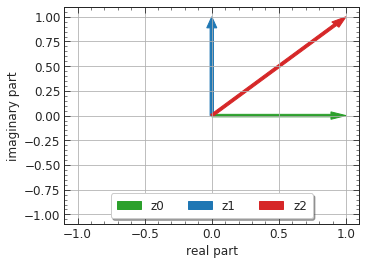

Output(layout=Layout(height='400px'))

In [6]:
# addition and subtraction

z0_re = widgets.FloatSlider(min=-5.,max=5.,step=0.5,value=1.0,continuous_update=False,description='$\t{Re}\{z_0\}$')
z0_im = widgets.FloatSlider(min=-5.,max=5.,step=0.5,value=0.0,continuous_update=False,description='$\t{Im}\{z_0\}$')
z1_re = widgets.FloatSlider(min=-5.,max=5.,step=0.5,value=0.0,continuous_update=False,description='$\t{Re}\{z_1\}$')
z1_im = widgets.FloatSlider(min=-5.,max=5.,step=0.5,value=1.0,continuous_update=False,description='$\t{Im}\{z_1\}$')
operator = widgets.Dropdown(options=['add','subtract'],value='add',description='operation',disabled=False)
mode = widgets.Dropdown(options=['dynamic','static'],value='dynamic',description='display mode',disabled=False)

ui_top = widgets.HBox([z0_re,z0_im,operator])
ui_bottom = widgets.HBox([z1_re,z1_im,mode])
ui = widgets.VBox([ui_top,ui_bottom])

out = widgets.interactive_output(plot_complex_numbers,{'z0_re':z0_re,'z0_im':z0_im,'z1_re':z1_re,'z1_im':z1_im,'operator':operator,'mode':mode})
out.layout.height = '400px'
display(ui,out)

# Multiplication and Division

For multiplication and division, the Polar form is more suitable than the Cartesian. Depending on the operation, the magnitudes of the two complex numbers are multiplied or divided, as you would with any purely real numbers. Since the phases $\phi$ are both exponents with the same base **e**, they can simply be added or subtracted from eachother as follows:


$$
\begin{eqnarray}
e^{j \cdot \phi_1} \cdot e^{j \cdot \phi_2} &=& e^{j \cdot (\phi_1+\phi_2)} 
\end{eqnarray}
$$

and

$$
\begin{eqnarray}
\frac{e^{j \cdot \phi_1}}{e^{j \cdot \phi_2}} &=& e^{j \cdot (\phi_1-\phi_2)}
\end{eqnarray}
$$

In [7]:
def plot_complex_numbers_polar(mag_z0, arg_z0_deg, mag_z1, arg_z1_deg, mode='dynamic', operator='multiply'):
    
    z0 = mag_z0 * cmath.exp((arg_z0_deg*(2*np.pi/360))*cmath.sqrt(-1))
    z1 = mag_z1 * cmath.exp((arg_z1_deg*(2*np.pi/360))*cmath.sqrt(-1))
    
    if operator=='add':
        z2 = z0+z1
    elif operator=='subtract':
        z2 = z0-z1
    elif operator=='multiply':
        z2 = z0*z1
    elif operator=='divide':
        z2 = z0/z1
    else:
        raise TypeError('Not a valid operation')
        
    
    n_row = 1
    n_col = 3
    fig_size = [i*j for i,j in zip(plt.rcParams['figure.figsize'], [n_col, n_row])]
    fig = plt.figure(figsize=fig_size)
    
    if mode == 'dynamic':
        x_lim = np.max(np.abs(np.asarray([z0,z1,z2]).real))*1.1
        y_lim = np.max(np.abs(np.asarray([z0,z1,z2]).imag))*1.1

# avoid singular transformation by setting xlim/ylim to at least 1
        if y_lim < 1:
            y_lim = 1 
        if x_lim < 1:
            x_lim = 1
    elif mode == 'static':
        x_lim = 10
        y_lim = 10
    else:
        raise TypeError('Not a valid display mode')
        
    ax = fig.add_subplot(n_row, n_col, 1)

    ar1 = ax.arrow(0,0,z0.real, z0.imag, width=0.025, length_includes_head=True, color='C2')
    ar2 = ax.arrow(0,0,z1.real, z1.imag, width=0.025, length_includes_head=True, color='C0')
    ar3 = ax.arrow(0,0,z2.real, z2.imag, width=0.025, length_includes_head=True, color='C3')
    ax.set(xlabel='real part', ylabel='imaginary part', xlim=(-x_lim,x_lim), ylim=(-y_lim,y_lim))
    plt.legend([ar1,ar2,ar3],['z0','z1','z2'],loc='lower center',ncol=3,fancybox=True,shadow=True,borderpad=0.5,framealpha=1)
               
    zs = [['','magnitude','phase [rad]','phase [degrees]'],
        ['z0','{:1.2f}'.format(np.abs(z0)),'{:1.2f}'.format(np.angle(z0)),'{:1.2f}'.format(np.angle(z0)/np.pi*180)],
        ['z1','{:1.2f}'.format(np.abs(z1)),'{:1.2f}'.format(np.angle(z1)),'{:1.2f}'.format(np.angle(z1)/np.pi*180)],
        ['z2','{:1.2f}'.format(np.abs(z2)),'{:1.2f}'.format(np.angle(z2)),'{:1.2f}'.format(np.angle(z2)/np.pi*180)],
        ]
    
    display(HTML('<table><tr>{}</tr></table>'.format('</tr><tr>'.join('<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in zs))))

,magnitude,phase [rad],phase [degrees]
z0,1.50,0.52,30.00
z1,1.50,1.05,60.00
z2,2.25,1.57,90.00


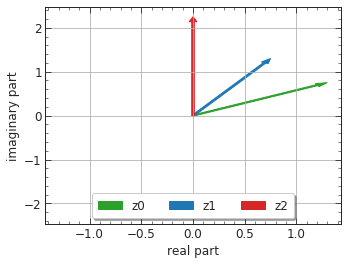

Output(layout=Layout(height='400px'))

In [8]:
# multiplication and division

mag_z0 = widgets.FloatSlider(min=0.0,max=3.,step=0.1,value=1.5,continuous_update=False,description='$\t | z_0 |$')
arg_z0_deg = widgets.FloatSlider(min=-180.,max=180.,step=1.,value=30.0,continuous_update=False,description='$\t arg(z_0)$ in °')
mag_z1 = widgets.FloatSlider(min=0.0,max=3.,step=0.1,value=1.5,continuous_update=False,description='$\t | z1 |$')
arg_z1_deg = widgets.FloatSlider(min=-180.,max=180.,step=1.,value=60.0,continuous_update=False,description='$\t arg(z_1)$ in °')
operator = widgets.Dropdown(options=['multiply','divide'],value='multiply',description='operation',disabled=False)
mode = widgets.Dropdown(options=['dynamic','static'],value='dynamic',description='display mode',disabled=False)

ui_top = widgets.HBox([mag_z0,arg_z0_deg,operator])
ui_bottom = widgets.HBox([mag_z1,arg_z1_deg,mode])
ui = widgets.VBox([ui_top,ui_bottom])

out = widgets.interactive_output(plot_complex_numbers_polar,{'mag_z0':mag_z0,'arg_z0_deg':arg_z0_deg,'mag_z1':mag_z1,'arg_z1_deg':arg_z1_deg,'operator':operator,'mode':mode})
out.layout.height = '400px'
display(ui,out)

# Additional Resources
With this, you should have a solid understanding of how to perform basic operations with complex numbers and how to visualize them. The following are some resources for further expanding your understanding of their significance in all kinds of technical applications.
If you are an audiovisually receptive learner, this low-threshold video lecture by [3Blue1Brown](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw) is a good starting point:

In [9]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/5PcpBw5Hbwo" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

This video by [Zach Star](https://www.youtube.com/channel/UCpCSAcbqs-sjEVfk_hMfY9w) establishes Euler's formula from the Maclaurin series for sin(x) and cos(x), and explains its application in technical contexts, including electrical engineering. A great and concise overview that ties the application fields of complex mathematics together:

In [10]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/_h49ilnTmW4" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Lastly, [this](https://www.khanacademy.org/math/precalculus/x9e81a4f98389efdf:complex/x9e81a4f98389efdf:complex-mul-div-polar/a/visualizing-complex-powers) article by Khan Academy explores some more odd complex number calculations, using a graphical approach.

# Thank you for reading!